In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/cars.csv')
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    int64  
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    int64  
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 14.4 KB


In [4]:
data.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
dtype: int64

In [5]:
data.shape

(261, 7)

In [6]:
data.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.750958,106.360153,3022.134100,15.547893,1976.819923
std,7.823570,1.733310,108.869697,40.499959,857.036976,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3693.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


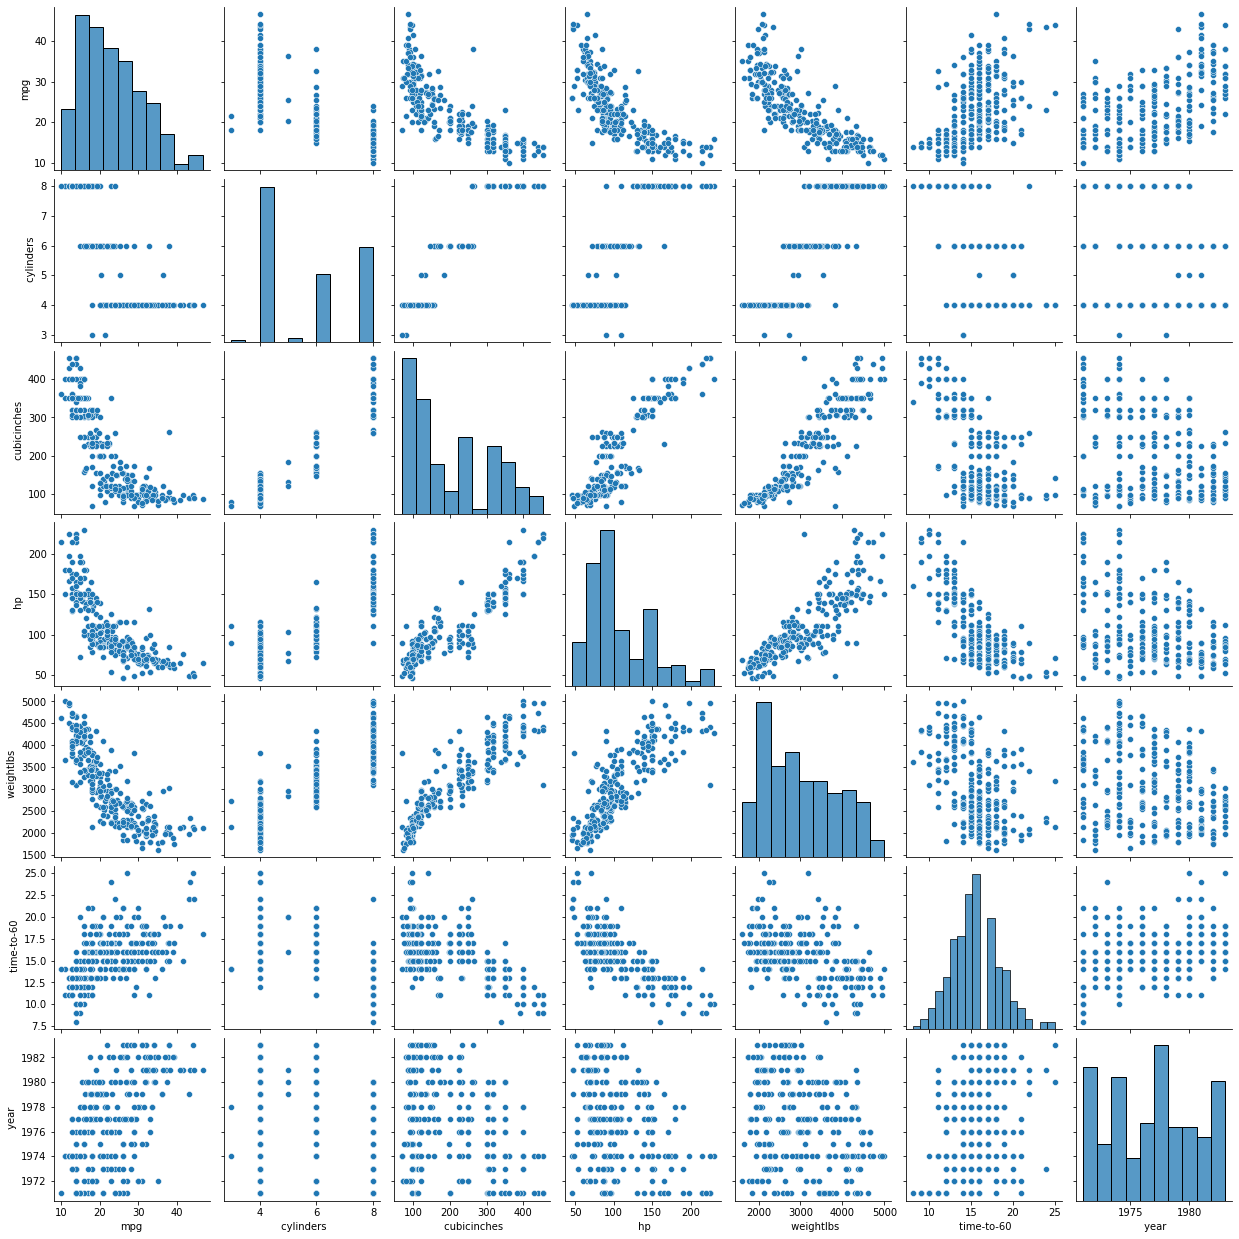

In [7]:
sns.pairplot(data)

In [8]:
cars_df = data.iloc[:,1:4]
cars_df.head()

,cylinders,cubicinches,hp
0,8,350,165
1,4,89,71
2,8,302,140
3,8,400,150
4,4,98,63


# Kmeans

In [9]:
#labelled data 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

194503699.73172414
48330048.409950554
23486145.115754455
12504926.95470238
9116810.766384596
6746303.184096388
5033305.571435187
3765979.263003238
3169178.1249673567
2673491.9373097657
2360191.5022656517
2084238.4910026048


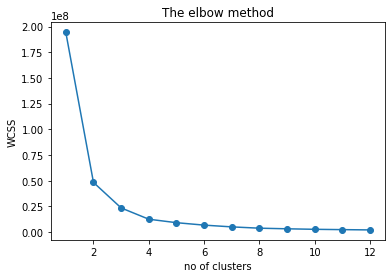

In [10]:
plt.plot(range(1,13),wcss, '-o')
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 4)
model_kmeans.fit(data)
labels = model_kmeans.predict(data)
print(labels)


[1 3 2 2 3 2 1 1 2 3 3 3 1 2 1 1 3 2 3 3 3 0 0 1 3 3 3 1 2 3 3 2 0 1 3 2 3
 0 1 2 2 1 2 2 0 0 2 3 3 0 1 2 2 3 1 1 0 3 3 2 0 3 0 3 1 2 3 3 3 2 0 0 3 0
 3 0 0 0 3 3 1 1 2 0 3 3 0 2 3 0 3 3 1 2 3 2 1 0 2 2 1 1 3 3 3 0 3 3 0 2 3
 0 1 3 3 2 0 0 3 1 3 3 1 0 3 0 1 3 0 3 3 0 1 2 1 1 3 2 0 0 0 3 0 3 2 0 2 0
 2 2 0 0 1 0 0 2 3 3 0 2 0 1 0 0 3 2 2 0 0 3 3 0 2 0 3 3 1 2 2 3 0 3 1 2 3
 0 2 2 1 1 0 0 1 1 1 3 0 3 3 3 3 0 2 2 3 2 3 0 1 0 0 2 3 3 2 0 3 1 0 1 2 0
 1 2 1 3 1 3 0 0 2 0 0 1 0 3 1 0 3 3 1 0 1 0 1 2 2 3 3 0 3 0 0 1 0 3 2 3 0
 2 2]


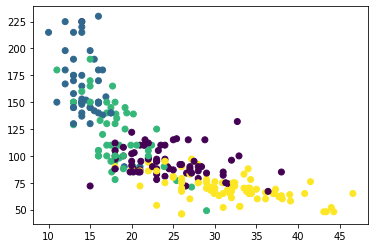

In [12]:
mpg =data['mpg']
hp = data[' hp']
plt.scatter(mpg,hp,c=labels)
#so from the graph we know that there is an inclined relation between mileage and horesepower, as mileage increase horsepower decreases

In [13]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [14]:
#labelled data to unlabelled data
ks = range(1,6)
inertia = []
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(data)
  inertia.append(model.inertia_)
print(inertia)

[194503699.73172414, 48330048.409950554, 23486145.115754455, 12504926.95470238, 9101073.13985752]


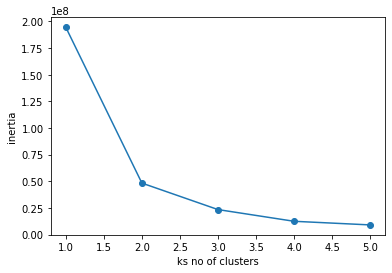

In [15]:
plt.plot(ks,inertia, '-o')
plt.xlabel("ks no of clusters")
plt.ylabel("inertia")
plt.show()

# evaluate the model weightlbs

In [16]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [17]:
data[' year']

0      1972
1      1980
2      1971
3      1971
4      1978
       ... 
256    1980
257    1979
258    1983
259    1972
260    1977
Name:  year, Length: 261, dtype: int64

In [18]:
weight = data[' weightlbs'].value_counts()


In [19]:
weight = data[' weightlbs']
df = pd.DataFrame({"label":labels, "weightlbs":weight})

In [20]:
df.head()

,label,weightlbs
0,1,4209
1,3,1925
2,2,3449
3,2,3761
4,3,2051


In [21]:
 pd.crosstab(df['label'],df['weightlbs'])

weightlbs,1613,1649,1755,1760,1773,1795,1800,1825,1834,1835,1875,1925,1937,1940,1945,1950,1955,1963,1965,1968,1975,1985,2003,2019,2020,2045,2050,2051,2065,2074,2075,2085,2110,2120,2124,2125,2126,2130,2135,2144,...,4082,4096,4098,4100,4129,4141,4190,4209,4215,4220,4237,4278,4295,4312,4320,4325,4335,4341,4354,4360,4363,4380,4385,4422,4425,4440,4457,4464,4498,4499,4615,4638,4654,4657,4668,4735,4906,4951,4952,4997
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### standard scalar

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipe = make_pipeline(scaler,model_kmeans)
pipe.fit(data)
labels_sc = pipe.predict(data)
print(labels_sc)

[1 3 1 1 3 0 1 1 0 3 3 3 1 1 0 1 3 1 2 2 3 2 0 1 3 3 2 1 0 3 2 0 2 0 3 0 2
 2 1 0 0 1 0 0 1 3 1 2 2 0 1 3 1 2 1 1 0 3 2 1 0 2 0 3 1 0 2 3 2 1 0 3 2 2
 2 3 0 2 2 3 1 1 1 2 2 2 0 0 2 3 3 2 1 0 2 0 1 0 1 0 1 1 2 3 3 3 3 2 2 1 2
 2 1 2 3 0 2 0 3 1 2 2 1 2 2 2 1 3 2 3 2 3 1 1 1 1 2 1 2 2 0 2 3 3 0 2 0 3
 1 1 3 2 1 0 2 0 2 3 0 0 3 1 0 0 2 0 0 3 0 3 3 0 2 3 2 2 1 1 1 3 0 3 1 1 3
 0 0 1 1 1 3 3 1 1 1 3 3 3 2 3 2 2 0 0 2 1 3 0 1 0 0 0 3 2 0 3 3 1 0 1 0 2
 1 0 1 2 1 2 2 3 1 3 2 1 2 3 1 0 3 2 1 0 1 2 1 1 1 3 2 3 3 2 3 1 0 2 0 3 0
 0 0]


In [23]:
df = pd.DataFrame({"label":labels_sc, "weightlbs":weight})
df

,label,weightlbs
0,1,4209
1,3,1925
2,1,3449
3,1,3761
4,3,2051
...,...,...
256,0,3840
257,3,1800
258,0,2835
259,0,3288


In [24]:
pd.crosstab(df['label'], df["weightlbs"])

weightlbs,1613,1649,1755,1760,1773,1795,1800,1825,1834,1835,1875,1925,1937,1940,1945,1950,1955,1963,1965,1968,1975,1985,2003,2019,2020,2045,2050,2051,2065,2074,2075,2085,2110,2120,2124,2125,2126,2130,2135,2144,...,4082,4096,4098,4100,4129,4141,4190,4209,4215,4220,4237,4278,4295,4312,4320,4325,4335,4341,4354,4360,4363,4380,4385,4422,4425,4440,4457,4464,4498,4499,4615,4638,4654,4657,4668,4735,4906,4951,4952,4997
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,1,1,0,1,1,1,0,0,2,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,1,2,0,0,0,1,1,0,0,1,0,0,0,1,1,2,2,0,1,1,2,1,1,0,0,1,1,2,1,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#standard scaling works fine on the model

## ***Normalization***

In [26]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
pipe1 = make_pipeline(norm,model_kmeans)
pipe1.fit(data)
labels_no = pipe1.predict(data)
print(labels_no)

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 2 2 1 0 1 3 1 3 0 2 1 1 1 2 0 3 1 0 3 2 1 0 1
 3 2 0 2 2 0 0 0 3 2 3 1 0 2 0 0 1 2 2 3 1 1 2 0 3 3 1 2 0 1 1 1 2 0 3 1 3
 1 0 0 3 1 3 2 2 0 3 1 1 3 0 1 3 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 3 1 1 3 0 1
 3 2 1 1 2 3 0 1 2 1 1 2 3 1 3 2 1 3 1 1 3 2 0 2 2 1 0 3 0 3 1 3 1 0 3 0 3
 2 0 3 3 2 0 3 0 1 1 3 0 0 2 0 3 1 0 0 3 3 1 1 3 2 3 1 1 2 0 0 1 0 1 2 0 3
 0 0 2 2 2 3 3 2 2 2 1 3 1 1 1 1 3 0 0 3 2 1 0 2 3 3 0 1 1 0 3 1 2 3 2 0 3
 2 2 2 1 2 1 3 3 0 3 3 2 0 1 2 0 1 1 2 0 2 3 2 0 2 1 1 3 1 3 3 2 3 3 2 1 3
 0 0]


In [27]:
weight = data[' weightlbs']
df = pd.DataFrame({"label":labels_no, "weightlbs":weight})

In [28]:
pd.crosstab(df['label'],df['weightlbs'])

weightlbs,1613,1649,1755,1760,1773,1795,1800,1825,1834,1835,1875,1925,1937,1940,1945,1950,1955,1963,1965,1968,1975,1985,2003,2019,2020,2045,2050,2051,2065,2074,2075,2085,2110,2120,2124,2125,2126,2130,2135,2144,...,4082,4096,4098,4100,4129,4141,4190,4209,4215,4220,4237,4278,4295,4312,4320,4325,4335,4341,4354,4360,4363,4380,4385,4422,4425,4440,4457,4464,4498,4499,4615,4638,4654,4657,4668,4735,4906,4951,4952,4997
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,2,2,1,1,1,1,1,2,1,1,1,1,1,1,1,2,2,1,1,1,2,1,1,1,1,1,1,2,1,1,2,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Heirarchial cluster

In [29]:
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [30]:
cars_df = data.iloc[:,0:4]
cars_df.head()

,mpg,cylinders,cubicinches,hp
0,14.0,8,350,165
1,31.9,4,89,71
2,17.0,8,302,140
3,15.0,8,400,150
4,30.5,4,98,63


In [31]:
cars_df.describe()

,mpg,cylinders,cubicinches,hp
count,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.750958,106.360153
std,7.823570,1.733310,108.869697,40.499959
min,10.000000,3.000000,68.000000,46.000000
25%,16.900000,4.000000,101.000000,75.000000
50%,22.000000,6.000000,156.000000,95.000000
75%,28.800000,8.000000,302.000000,138.000000
max,46.600000,8.000000,455.000000,230.000000


### Normalization using *dendogram*

In [32]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
cars_df = norm.fit_transform(cars_df)
cars_df

array([[0.03614965, 0.02065694, 0.9037413 , 0.42604947],
       [0.26964649, 0.03381147, 0.75230525, 0.60015362],
       [0.05098947, 0.02399505, 0.90581297, 0.4199133 ],
       ...,
       [0.08506454, 0.02319942, 0.89704428, 0.43305586],
       [0.07104919, 0.02368306, 0.91574508, 0.39471771],
       [0.08084903, 0.02204974, 0.91873897, 0.38587037]])

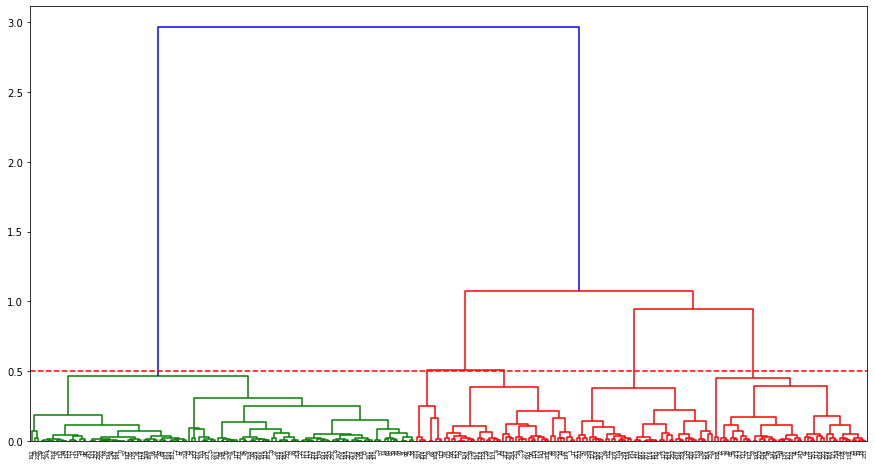

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(cars_df, method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='ascending',show_leaf_counts= 'True')
plt.hlines(0.5,0,5000,colors = 'r', linestyles='dashed')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, affinity="euclidean",linkage='ward')
labels = cluster.fit_predict(cars_df)
labels 

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 3, 1, 1, 1,
       1, 3, 1, 3, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2, 2, 1, 1, 2, 2, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 1, 1, 2, 3, 0, 1, 1,
       2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 3, 0, 2, 2, 1,
       2, 2, 1, 0, 0, 1, 3, 1, 0, 1, 2, 2, 1, 3, 3, 3, 1, 0, 2, 0, 2, 3,
       1, 1, 1, 1, 2, 1, 2, 3, 3, 2, 3, 0, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1,
       2, 1, 2, 0, 1, 2, 3, 1, 1, 1, 3, 1, 1, 3, 2, 0, 0, 2, 0, 2, 3, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 3, 0,
       2, 0, 3, 3, 1, 1, 3, 1, 0, 1, 1, 3, 3, 3, 0, 2, 1, 2, 0, 1, 3, 1,
       1, 2, 1, 3, 1, 0, 1, 0, 1, 3, 1, 3, 3, 1, 2, 0, 1, 1, 0, 3, 1, 1,
       1, 2, 1, 1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 1, 0, 1, 1, 1])

In [35]:
df =pd.DataFrame({'label':labels, "hp":data[ ' hp']})
df

,label,hp
0,1,165
1,0,71
2,1,140
3,1,150
4,0,63
...,...,...
256,1,130
257,0,60
258,1,112
259,1,100


In [36]:
pd.crosstab(df['label'],df['hp'])

hp,46,48,49,52,53,54,58,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,90,91,92,94,95,...,103,105,108,110,112,115,116,120,122,125,129,130,132,133,135,137,138,139,140,142,145,148,149,150,152,153,155,158,160,165,167,170,175,180,190,198,215,220,225,230
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,3,1,2,2,0,1,3,1,1,2,1,9,1,3,2,3,4,2,1,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,6,0,0,4,5,0,0,0,4,...,0,4,0,7,1,0,0,0,0,2,1,4,0,0,1,1,1,2,6,1,6,1,1,16,1,1,1,1,1,2,1,3,3,4,3,2,3,1,3,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,3,1,0,2,1,1,0,0,3,0,1,1,1,4,3,1,1,1,3,...,1,0,0,3,1,2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,2,1,3,0,0,1,1,0,1,0,1,3,0,4,1,2,4,0,2,0,2,...,0,2,1,1,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


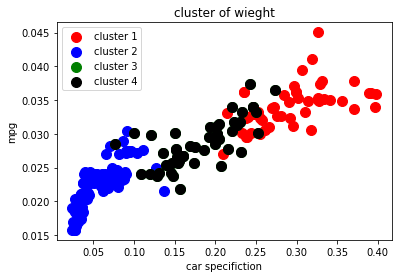

In [37]:
plt.scatter(cars_df[labels == 0, 0], cars_df[labels == 0,1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(cars_df[labels == 1, 0], cars_df[labels == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(cars_df[labels == 2, 0], cars_df[labels == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(cars_df[labels == 2, 0], cars_df[labels == 2,1], s = 100, c = 'black', label = 'cluster 4')

plt.title('cluster of wieght')
plt.xlabel('car specifiction')
plt.ylabel('mpg')
plt.legend()
plt.show()

# Evaluate the model cylindres



1.   Standard scaling






In [38]:
cylinder = data[' cylinders'].value_counts()
cylinder = data[' cylinders']
df = pd.DataFrame({"label":labels, " cylinders":cylinder})
df

,label,cylinders
0,1,8
1,0,4
2,1,8
3,1,8
4,0,4
...,...,...
256,1,8
257,0,4
258,1,6
259,1,6


In [39]:
 pd.crosstab(df['label'],df[' cylinders'])

cylinders,3,4,5,6,8
label,,,,,
0,0,50,0,0,0
1,0,0,1,43,76
2,2,42,1,3,0
3,0,33,1,9,0


## standard scaling

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipe = make_pipeline(scaler,model_kmeans)
pipe.fit(cars_df)
labels_sc = pipe.predict(cars_df)
print(labels_sc)

[1 3 1 1 3 1 1 1 1 3 3 3 1 1 1 1 3 1 0 0 3 0 1 1 3 3 3 1 1 3 0 1 0 1 3 1 3
 0 1 1 2 1 1 1 1 2 1 2 0 1 1 2 1 2 1 1 2 0 3 1 1 0 0 3 1 1 3 3 3 1 1 0 0 0
 0 1 1 2 0 3 1 1 1 0 2 3 1 1 3 2 3 0 1 1 0 1 1 1 1 1 1 1 0 3 3 2 3 3 0 1 0
 0 1 3 3 1 2 1 3 1 0 3 1 2 3 2 1 3 0 3 0 2 1 1 1 1 3 1 0 2 2 3 2 3 1 2 1 2
 1 1 2 2 1 1 0 1 0 3 1 0 2 1 2 1 3 1 1 2 0 3 3 0 3 0 2 3 1 1 1 3 1 3 1 1 0
 1 1 1 1 1 2 2 1 1 1 3 2 3 3 3 2 2 1 1 2 1 3 1 1 2 2 2 3 3 1 0 3 1 2 1 1 0
 1 2 1 3 1 3 1 2 1 2 2 1 0 3 1 1 3 2 1 1 1 0 1 1 1 3 3 2 3 0 3 1 2 0 1 3 1
 1 1]


In [41]:

df = pd.DataFrame({"label":labels_sc, " cylinders":cylinder})
pd.crosstab(df['label'],df[' cylinders'])

cylinders,3,4,5,6,8
label,,,,,
0,2,33,1,3,0
1,0,0,1,42,76
2,0,32,0,10,0
3,0,60,1,0,0


## normalization

In [42]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
pipe1 = make_pipeline(norm,model_kmeans)
pipe1.fit(data)
labels_no = pipe1.predict(data)
print(labels_no)

[1 2 3 1 2 1 1 1 3 2 2 2 1 3 1 1 2 3 2 0 2 0 3 1 2 2 2 1 3 0 2 3 0 1 2 3 2
 0 1 3 1 1 3 3 3 0 1 0 2 3 1 3 3 2 1 1 0 2 2 1 3 0 0 2 1 3 2 2 2 1 3 0 2 0
 2 3 3 0 2 0 1 1 3 0 2 2 0 3 2 0 2 2 1 3 2 1 1 3 1 1 1 1 2 2 2 0 2 2 0 3 2
 0 1 2 2 1 0 3 2 1 2 2 1 0 2 0 1 2 0 2 2 0 1 3 1 1 2 3 0 3 0 2 0 2 3 0 3 0
 1 3 0 0 1 3 0 3 2 2 0 3 3 1 3 0 2 3 3 0 0 2 2 0 1 0 2 2 1 3 3 2 3 2 1 3 0
 3 3 1 1 1 0 0 1 1 1 2 0 2 2 2 2 0 3 3 0 1 2 3 1 0 0 3 2 2 3 0 2 1 0 1 3 0
 1 1 1 2 1 2 0 0 3 0 0 1 3 2 1 3 2 2 1 3 1 0 1 3 1 2 2 0 2 0 0 1 0 0 1 2 0
 3 3]


In [43]:
df = pd.DataFrame({"label":labels_no, " cylinders":cylinder})
pd.crosstab(df['label'],df[' cylinders'])

cylinders,3,4,5,6,8
label,,,,,
0,1,45,2,13,0
1,0,1,0,7,58
2,1,75,0,0,0
3,0,4,1,35,18
